<a href="https://colab.research.google.com/github/mladbago/podstawy_sztucznej_inteligencji/blob/main/Z10_J_MNIST_BatchNormalization_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

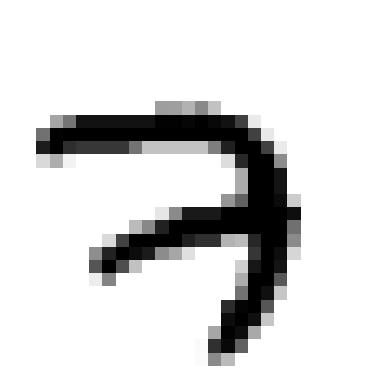

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

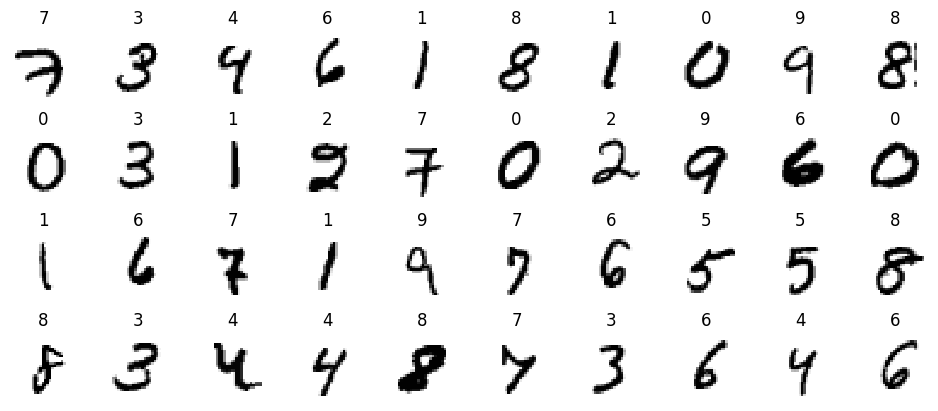

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [9]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 0.5879 - accuracy: 0.8511 - val_loss: 0.2970 - val_accuracy: 0.9182
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2811 - accuracy: 0.9199 - val_loss: 0.2317 - val_accuracy: 0.9364
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2293 - accuracy: 0.9344 - val_loss: 0.1925 - val_accuracy: 0.9466
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.1956 - accuracy: 0.9441 - val_loss: 0.1711 - val_accuracy: 0.9544
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1712 - accuracy: 0.9508 - val_loss: 0.1535 - val_accuracy: 0.9590
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1521 - accuracy: 0.9568 - val_loss: 0.1403 - val_accuracy: 0.9616
Epoch 7/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1365 - accuracy: 0.9611 - val_loss: 0.1291 - val_acc

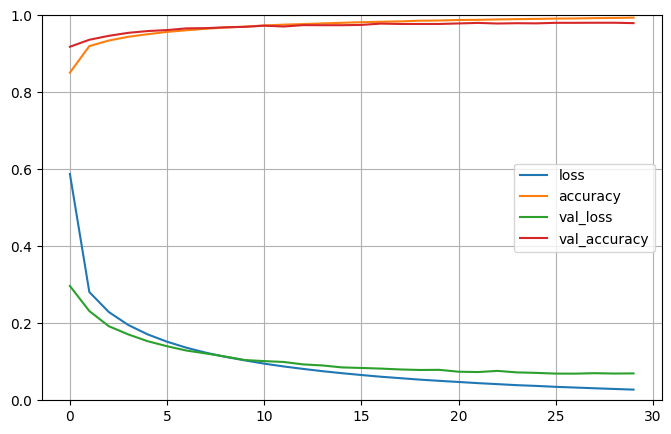

In [12]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9773


[0.07098471373319626, 0.9772999882698059]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 161ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

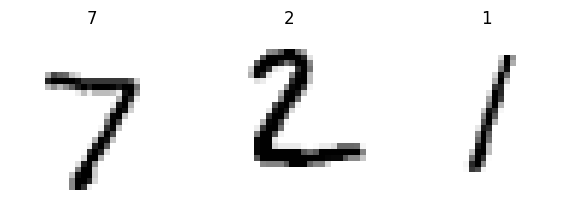

In [15]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Zad.
Do modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.3))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia


In [16]:
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])


model2.add(BatchNormalization())
model2.add(Activation("relu"))
model2.add(Dropout(0.3))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 10)                0         
                                                        

In [17]:
model2.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 18s 9ms/step - loss: nan - accuracy: 0.1016 - val_loss: nan - val_accuracy: 0.0958
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: nan - accuracy: 0.1003 - val_loss: nan - val_accuracy: 0.0958
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: nan - accuracy: 0.1015 - val_loss: nan - val_accuracy: 0.0958
Epoch 4/30
1719/1719 [==============================] - 13s 8ms/step - loss: nan - accuracy: 0.1021 - val_loss: nan - val_accuracy: 0.0958
Epoch 5/30
1719/1719 [==============================] - 14s 8ms/step - loss: nan - accuracy: 0.1031 - val_loss: nan - val_accuracy: 0.0958
Epoch 6/30
1719/1719 [==============================] - 13s 8ms/step - loss: nan - accuracy: 0.1007 - val_loss: nan - val_accuracy: 0.0958
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: nan - accuracy: 0.1018 - val_loss: nan - val_accuracy: 0.0958
Epoch 8/30
1719/1719 [=====

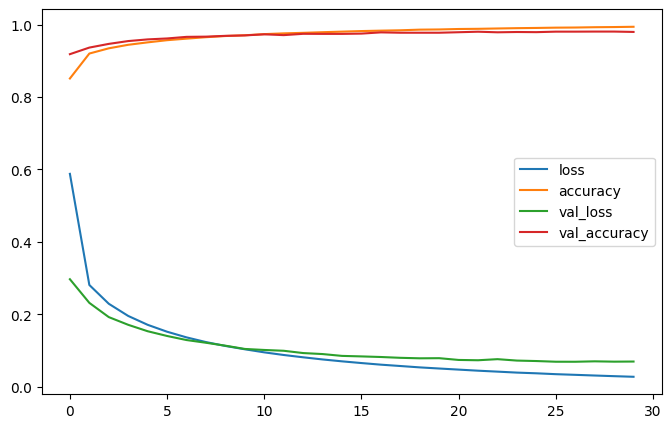

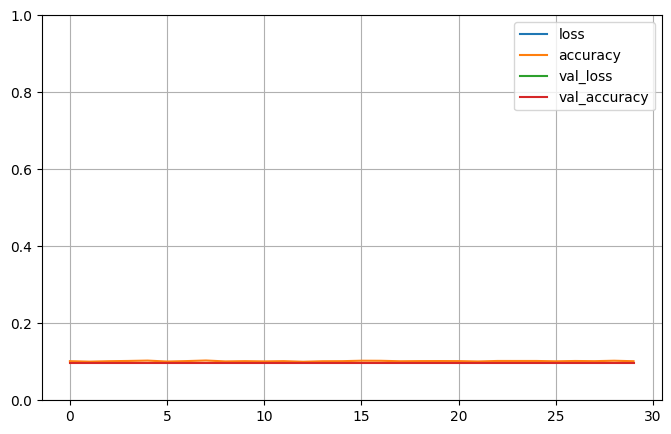

In [19]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
